In [1]:
from __future__ import division, print_function
from itertools import product as cproduct
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
%matplotlib inline

sys.path.append('/Users/rkp/Dropbox/Repositories/be_more_spontaneous')
sys.path.append('/Users/rkp/Dropbox/Repositories/reusable')
from figure_magic import axis_tools
from jupyter_netviz import animation

import network
import network_param_gen

In [2]:
N_CHAINS = 5
CHAIN_LENGTH = 5
W_STRONG = 2
GAIN = 6

In [3]:
# make network
weights = W_STRONG * network_param_gen.chain_weight_matrix(
    n_chains=N_CHAINS, chain_length=CHAIN_LENGTH,
)
ntwk = network.RecurrentSoftMaxModel(
    weights=weights, gain=GAIN, shape=(N_CHAINS, CHAIN_LENGTH)
)
ntwk.store_voltages = True

# make position dictionary
pos = {ctr: p[::-1] for ctr, p in enumerate(cproduct(range(N_CHAINS), range(CHAIN_LENGTH)))}

In [4]:
for _ in range(10):
    ntwk.step()

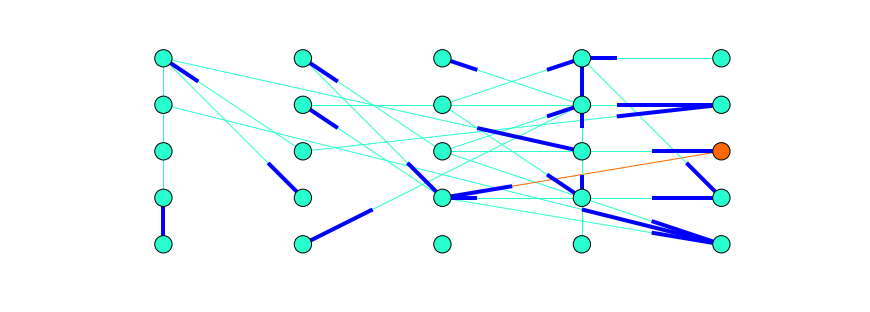

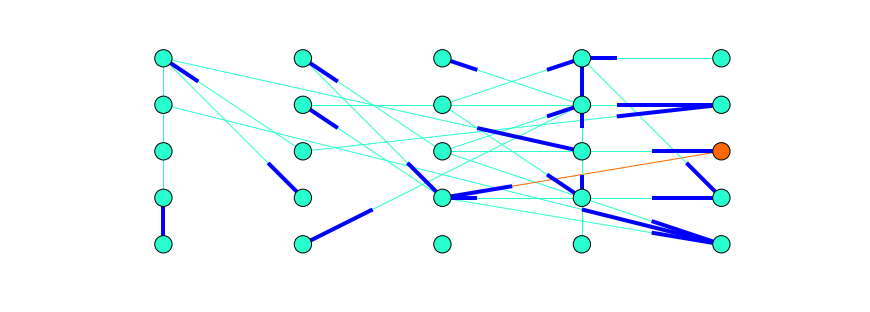

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
animation.animate_network(
    ax, weights, ntwk.rs_history, pos=pos, dt=.05,
    vmin=-1, vmax=1.5, edge_vmin=-1, edge_vmax=1.5, edge_width=2,
)

In [62]:
N_CHAINS = 5
CHAIN_LENGTH = 5
W_STRONG = 2
GAIN = 3
HDE_INPUT_VALUE = 0

In [63]:
# make base network
weights = W_STRONG * network_param_gen.chain_weight_matrix(
    n_chains=N_CHAINS, chain_length=CHAIN_LENGTH,
)
ntwk = network.RecurrentSoftMaxLingeringModel(
    weights=weights, gain=GAIN, lingering_input_value=HDE_INPUT_VALUE, shape=(N_CHAINS, CHAIN_LENGTH),
)
ntwk.store_voltages = True

In [64]:
for _ in range(100):
    ntwk.step()

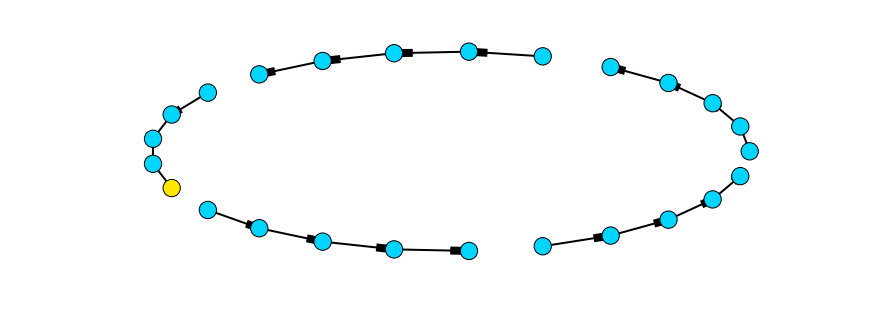

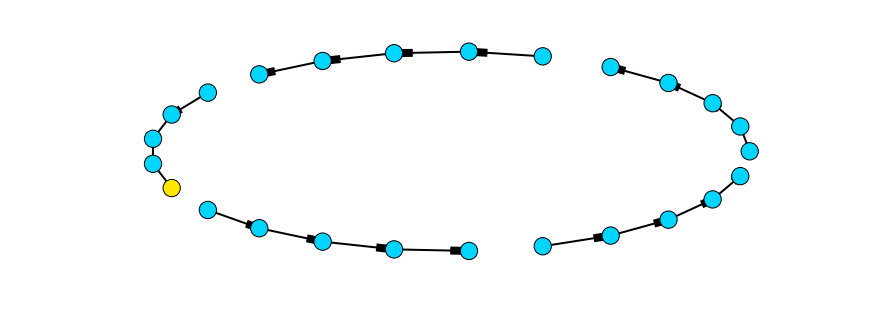

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
animation.animate_network(ax, weights, ntwk.rs_history, pos=nx.circular_layout, dt=.1, vmin=-1, vmax=2, width=2)

In [52]:
N_NODES = 25
W_STRONG = 2
W_WEAK = 1
P_CXN = .05
P_STRONG = .6
GAIN = 2
HDE_INPUT_VALUE = 1

In [53]:
cxn_mask = np.random.rand(N_NODES, N_NODES) < P_CXN
strong_mask = np.random.rand(N_NODES, N_NODES) < P_STRONG
weights = np.zeros((N_NODES, N_NODES), dtype=float)
weights[cxn_mask & strong_mask] = W_STRONG
weights[cxn_mask & ~strong_mask] = W_WEAK
np.fill_diagonal(weights, 0)

In [54]:
ntwk = network.RecurrentSoftMaxLingeringModel(
    weights=weights, gain=GAIN, lingering_input_value=HDE_INPUT_VALUE,
)
ntwk.store_voltages = True

In [55]:
for _ in range(100):
    ntwk.step()

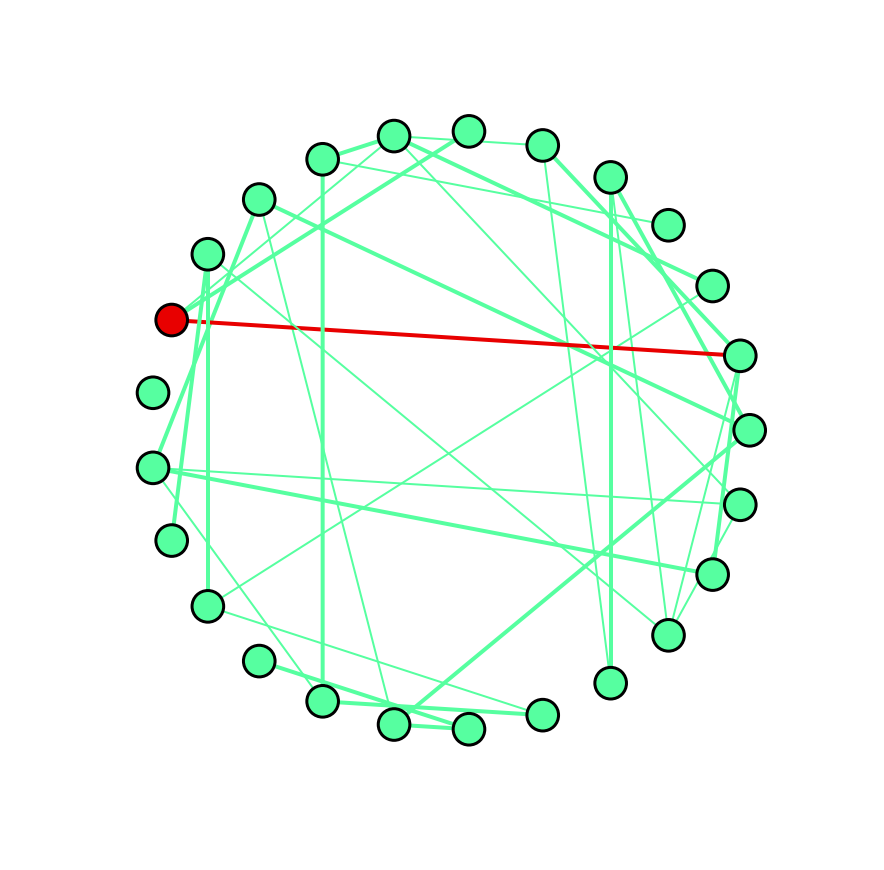

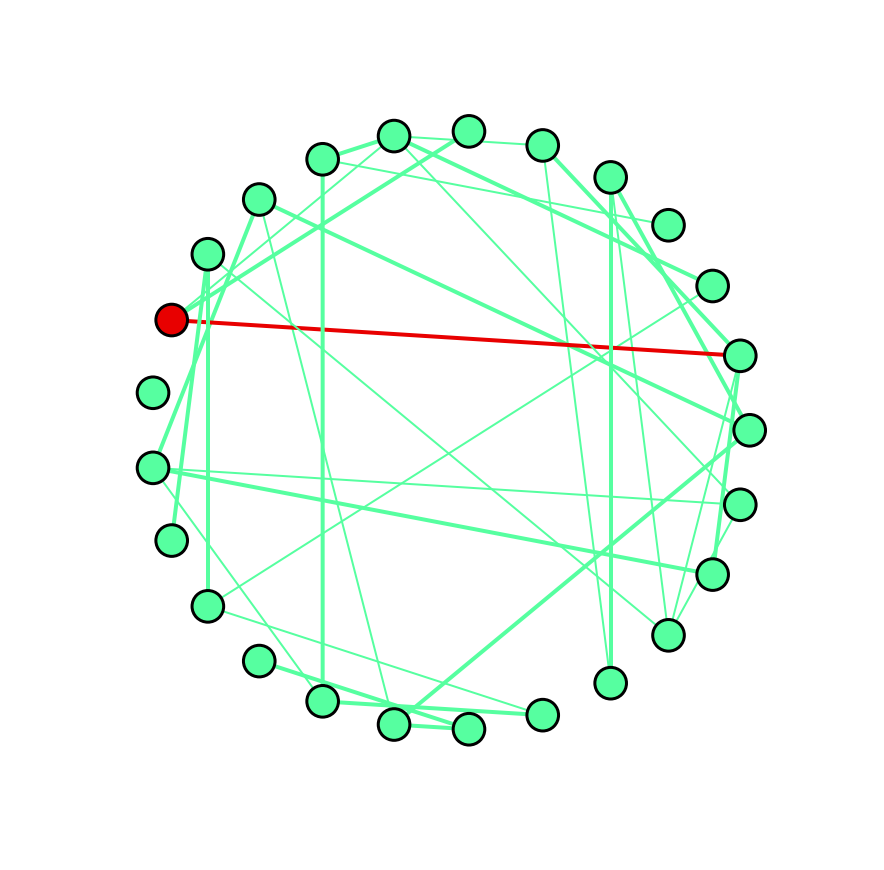

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
animation.animate_network(
    ax, weights, ntwk.rs_history, pos=nx.circular_layout, dt=1,
    vmin=-1, vmax=1.2, edge_vmin=-1, edge_vmax=1.2,
    node_size=1000, linewidths=3, width=2*weights[cxn_mask], arrows=False,
)